# Email Classification 

Description: In this ipynb it will be used different techniques in this classification task  we going to filter a email message as spam or ham.

In [166]:
#Import libraries
import numpy as np 
import pandas as pd 
import nltk
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

In [54]:
#Load dataset
inbox_df = pd.read_csv("Data/ham.csv", encoding='latin-1')
inbox_df.head()


,"ï»¿""Subject""",Body,From: (Name),From: (Address),From: (Type),To: (Name),To: (Address),To: (Type),CC: (Name),CC: (Address),CC: (Type),BCC: (Name),BCC: (Address),BCC: (Type),Billing Information,Categories,Importance,Mileage,Sensitivity
0,Westminster Savings Credit Union is looking fo...,"Roberta Bukowski, Westminster Savings Credit U...",LinkedIn,jobs-listings@linkedin.com,SMTP,Roberta Bukowski,rfonsecacarvalho@hotmail.com,SMTP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,NaN,Normal
1,Dia das CrianÃ§as com atÃ© 20%OFF,"Presentes de Sophie, Quasar Next, Boti Baby e ...",Clube Viva O BoticÃ¡rio ð,noreply@fidelidade.oboticario.com.br,SMTP,rfonsecacarvalho@hotmail.com,rfonsecacarvalho@hotmail.com,SMTP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,NaN,Normal
2,A espera acabou!,Casa Riachuelo chegou no Botafogo Praia Shoppi...,Botafogo Praia Shopping,botafogopraia@mail.botafogopraiashopping.com.br,SMTP,rfonsecacarvalho@hotmail.com,rfonsecacarvalho@hotmail.com,SMTP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,NaN,Normal
3,2 new jobs for 'treasurer',View jobs in Greater Vancouver Metropolitan Ar...,LinkedIn Job Alerts,jobalerts-noreply@linkedin.com,SMTP,Roberta Bukowski,rfonsecacarvalho@hotmail.com,SMTP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,NaN,Normal
4,"Roberta, please add me to your LinkedIn network","Hi Roberta, I'd like to join your LinkedIn net...",Pankaj Gaur,invitations@linkedin.com,SMTP,Roberta Bukowski,rfonsecacarvalho@hotmail.com,SMTP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,NaN,Normal


In [55]:
#Load dataset
spam_df = pd.read_csv("Data/spam.csv", encoding='latin-1')
spam_df.head()

,"ï»¿""Subject""",Body,From: (Name),From: (Address),From: (Type),To: (Name),To: (Address),To: (Type),CC: (Name),CC: (Address),CC: (Type),BCC: (Name),BCC: (Address),BCC: (Type),Billing Information,Categories,Importance,Mileage,Sensitivity
0,Temos um presente para vocÃª! ð ð¥³,Aproveite hoje mesmo e troque seus pontos por ...,Clube Viva O BoticÃ¡rio ð,noreply@fidelidade.oboticario.com.br,SMTP,rfonsecacarvalho@hotmail.com,rfonsecacarvalho@hotmail.com,SMTP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,NaN,Normal
1,Confira as condiÃ§Ãµes para financiar seu imÃ³...,E-mail classificado como #EXTERNO.CONFIDENCIAL...,ag3072@caixa.gov.br,ag3072@caixa.gov.br,SMTP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,NaN,Normal
2,Live no app com Preta Gil!,"Ã HOJE, sÃ³ no app! NÃ£o perca!\r\n <http://c...",Clube Viva O BoticÃ¡rio ð,noreply@fidelidade.oboticario.com.br,SMTP,rfonsecacarvalho@hotmail.com,rfonsecacarvalho@hotmail.com,SMTP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,NaN,Normal
3,Reminder: Please confirm your signature,<https://click.e.change.org/q/EBYy30tbdULpXkj...,Change.org,change@a.change.org,SMTP,Roberta Carvalho,rfonsecacarvalho@hotmail.com,SMTP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,NaN,Normal
4,Ãltimos dia de BotiPromo! ð±,Corre aproveitar atÃ© 50%OFF em mais de 300 pr...,Clube Viva O BoticÃ¡rio ð,noreply@fidelidade.oboticario.com.br,SMTP,rfonsecacarvalho@hotmail.com,rfonsecacarvalho@hotmail.com,SMTP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,NaN,Normal


In [56]:
#Dimensions of the two DataFrames:
print(inbox_df.shape)
print(spam_df.shape)

(1263, 19)
(177, 19)


In [57]:
#Column Names
print(inbox_df.columns)
print(spam_df.columns)

Index(['ï»¿"Subject"', 'Body', 'From: (Name)', 'From: (Address)',
       'From: (Type)', 'To: (Name)', 'To: (Address)', 'To: (Type)',
       'CC: (Name)', 'CC: (Address)', 'CC: (Type)', 'BCC: (Name)',
       'BCC: (Address)', 'BCC: (Type)', 'Billing Information', 'Categories',
       'Importance', 'Mileage', 'Sensitivity'],
      dtype='object')
Index(['ï»¿"Subject"', 'Body', 'From: (Name)', 'From: (Address)',
       'From: (Type)', 'To: (Name)', 'To: (Address)', 'To: (Type)',
       'CC: (Name)', 'CC: (Address)', 'CC: (Type)', 'BCC: (Name)',
       'BCC: (Address)', 'BCC: (Type)', 'Billing Information', 'Categories',
       'Importance', 'Mileage', 'Sensitivity'],
      dtype='object')


In [58]:
#Join the columns Subject and Body for Both datasets
inbox_df['text'] = inbox_df['ï»¿"Subject"'].str.cat(inbox_df['Body'],sep=" ")
spam_df['text']= spam_df['ï»¿"Subject"'].str.cat(spam_df['Body'],sep=" ")

In [59]:
#Creating Spam column
inbox_df['category'] = 'ham'
spam_df['category'] = 'spam'

In [60]:
#Concatenating both datasets in one
emails = pd.concat([inbox_df, spam_df])
emails.head()

,"ï»¿""Subject""",Body,From: (Name),From: (Address),From: (Type),To: (Name),To: (Address),To: (Type),CC: (Name),CC: (Address),...,BCC: (Name),BCC: (Address),BCC: (Type),Billing Information,Categories,Importance,Mileage,Sensitivity,text,category
0,Westminster Savings Credit Union is looking fo...,"Roberta Bukowski, Westminster Savings Credit U...",LinkedIn,jobs-listings@linkedin.com,SMTP,Roberta Bukowski,rfonsecacarvalho@hotmail.com,SMTP,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Normal,NaN,Normal,Westminster Savings Credit Union is looking fo...,ham
1,Dia das CrianÃ§as com atÃ© 20%OFF,"Presentes de Sophie, Quasar Next, Boti Baby e ...",Clube Viva O BoticÃ¡rio ð,noreply@fidelidade.oboticario.com.br,SMTP,rfonsecacarvalho@hotmail.com,rfonsecacarvalho@hotmail.com,SMTP,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Normal,NaN,Normal,Dia das CrianÃ§as com atÃ© 20%OFF Presentes de...,ham
2,A espera acabou!,Casa Riachuelo chegou no Botafogo Praia Shoppi...,Botafogo Praia Shopping,botafogopraia@mail.botafogopraiashopping.com.br,SMTP,rfonsecacarvalho@hotmail.com,rfonsecacarvalho@hotmail.com,SMTP,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Normal,NaN,Normal,A espera acabou! Casa Riachuelo chegou no Bota...,ham
3,2 new jobs for 'treasurer',View jobs in Greater Vancouver Metropolitan Ar...,LinkedIn Job Alerts,jobalerts-noreply@linkedin.com,SMTP,Roberta Bukowski,rfonsecacarvalho@hotmail.com,SMTP,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Normal,NaN,Normal,2 new jobs for 'treasurer' View jobs in Greate...,ham
4,"Roberta, please add me to your LinkedIn network","Hi Roberta, I'd like to join your LinkedIn net...",Pankaj Gaur,invitations@linkedin.com,SMTP,Roberta Bukowski,rfonsecacarvalho@hotmail.com,SMTP,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Normal,NaN,Normal,"Roberta, please add me to your LinkedIn networ...",ham


In [61]:
#Dimensions of new Dataframe
print(emails.shape)

(1440, 21)


In [62]:
#Get the column names
emails.columns

Index(['ï»¿"Subject"', 'Body', 'From: (Name)', 'From: (Address)',
       'From: (Type)', 'To: (Name)', 'To: (Address)', 'To: (Type)',
       'CC: (Name)', 'CC: (Address)', 'CC: (Type)', 'BCC: (Name)',
       'BCC: (Address)', 'BCC: (Type)', 'Billing Information', 'Categories',
       'Importance', 'Mileage', 'Sensitivity', 'text', 'category'],
      dtype='object')

In [63]:
# Drop unecessary columns
emails.drop(['ï»¿"Subject"', 'Body','From: (Name)', 'From: (Address)',
       'From: (Type)', 'To: (Name)', 'To: (Address)', 'To: (Type)',
       'CC: (Name)', 'CC: (Address)', 'CC: (Type)', 'BCC: (Name)',
       'BCC: (Address)', 'BCC: (Type)', 'Billing Information', 'Categories',
       'Importance', 'Mileage', 'Sensitivity'],
            axis='columns', inplace=True)

In [64]:
#Dimensions of new Dataframe
print(emails.shape)

(1440, 2)


In [65]:
# Head of new Dataframe
emails.head()

,text,category
0,Westminster Savings Credit Union is looking fo...,ham
1,Dia das CrianÃ§as com atÃ© 20%OFF Presentes de...,ham
2,A espera acabou! Casa Riachuelo chegou no Bota...,ham
3,2 new jobs for 'treasurer' View jobs in Greate...,ham
4,"Roberta, please add me to your LinkedIn networ...",ham


In [66]:
#Checking for duplicates and removing them
emails.drop_duplicates(inplace = True)

In [67]:
#Show the number of missing (NAN, NaN, na) data for each column
emails.isnull().sum()

text        0
category    0
dtype: int64

In [68]:
#Dimensions of final Dataframe
print(emails.shape)

(1440, 2)


Text(0.5, 1.0, 'Distribution of Spam and Ham')

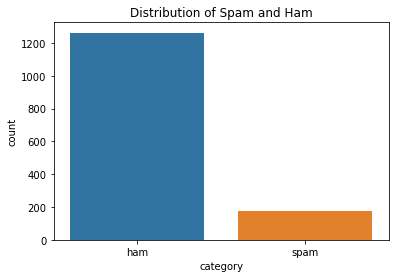

In [69]:
sns.countplot(x = "category", data = emails)
emails.loc[:, 'category'].value_counts()
plt.title('Distribution of Spam and Ham')

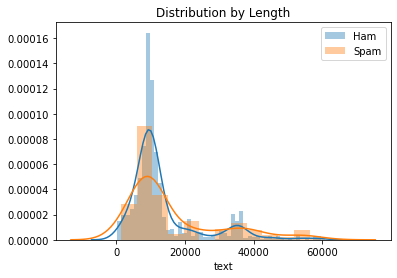

In [70]:
# plotting graph by length.

ham =emails[emails['category'] == 'ham']['text'].str.len()
sns.distplot(ham, label='Ham')
spam = emails[emails['category'] == 'spam']['text'].str.len()
sns.distplot(spam, label='Spam')
plt.title('Distribution by Length')
plt.legend()

In [71]:
emails.groupby('category').describe()

text                                                               
         count unique                                                top freq
category                                                                     
ham       1263   1263  sÃ¡bado, 22 de fevereiro de 2020  <https://p.s...    1
spam       177    177  Here comes the sun! ð $7 Body Care + $10 of...    1

In [72]:
#Need to download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rfons\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [73]:
#Tokenization (a list of tokens), will be used as the analyzer
#1.Punctuations are [!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~]
#2.Stop words in natural language processing, are useless words (data).
def process_text(text):
    
    #1 Remove Punctuationa
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    #2 Remove Stop Words
    clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english', 'portuguese')]
    
    #3 Return a list of clean words
    return clean_words

In [74]:
#Show the Tokenization of the first 5 rows
emails['text'].head().apply(process_text)

0    [Westminster, Savings, Credit, Union, looking,...
1    [Dia, das, CrianÃ§as, com, atÃ©, 20OFF, Presen...
2    [espera, acabou, Casa, Riachuelo, chegou, Bota...
3    [2, new, jobs, treasurer, View, jobs, Greater,...
4    [Roberta, please, add, LinkedIn, network, Hi, ...
Name: text, dtype: object

In [75]:
from sklearn.feature_extraction.text import CountVectorizer

In [76]:
vectorizer = CountVectorizer()
messages_bow = vectorizer.fit_transform(emails['text'])

In [77]:
vectorizer.get_feature_names()

['00',
 '000',
 '000000',
 '000001444409271554',
 '0001',
 '000fa0e4695a',
 '001',
 '0011',
 '00180e03f4dd',
 '00360305',
 '005',
 '0052gihr_gg5ffkbirfif8v3uyskwtpuzddtuaxvxuvvnya06fypgw5l5ignggrm4',
 '0059be0j8hveuqbbswdaawdmq',
 '005ccce18ce2',
 '006e',
 '007',
 '007099661a1c',
 '0072',
 '0081c3d30b39',
 '00843b6846d6',
 '009f854ccffa',
 '00am',
 '00azyy8gtwzanl677cmjxpc2vyyjfj',
 '00b973640767',
 '00bc60da',
 '00cbe37e',
 '00cd',
 '00dwsrirhas8nloqf89ubomk',
 '00e0',
 '00ef',
 '00f43671ffbd',
 '00fde707135b',
 '00gnya',
 '00le9qhdyodpxidrrb8a25ztl45hqle0tr5ko1cfn1i',
 '00linpyvpsecedz8xxcetlczpu8lz9tqnytwjf',
 '00my4bxs4j2ycwps',
 '00pm',
 '00rnzr8jm',
 '00u',
 '00uzuot1bl7efoxjidq',
 '01',
 '010',
 '0100016e040fde04',
 '0100016e28507f51',
 '0100016f34e2cc15',
 '0100016f4952ebdf',
 '0100016ff8320b14',
 '0100017078856a03',
 '01000172a0b3b012',
 '01000172a4701ff8',
 '010001734028aff6',
 '01000173991c3e83',
 '01000174acc6e90a',
 '01000175355ceee9',
 '0103',
 '010k7fdhn',
 '0111',
 '012

In [78]:
print(messages_bow.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


In [79]:
#Get the shape of spamham_bow
messages_bow.shape

(1440, 134877)

# Train and test data set splitting

The following data partitioning have been suggested in several literatures in the field of Machine learning/ 
Pattern recognition:70% of the entire Dataset for training (Training data), hence in this work is going to be used the 70/30 ratio.

In [115]:
#Split data into 70% training & 30% testing data sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(messages_bow, emails['category'], test_size = 0.30, random_state = 1)

# Logistic Regression

In [172]:
from sklearn.linear_model import LogisticRegression

In [173]:
logmodel = LogisticRegression(C=0.001, solver ='liblinear', random_state= 1)
logmodel.fit(X_train,y_train)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [175]:
#Evaluate the model on the training data set
pred1 = logmodel.predict(X_train)
print(classification_report(y_train ,pred1 ))
print('Confusion Matrix: \n',confusion_matrix(y_train,pred1))
print()
print('Accuracy: ', accuracy_score(y_train,pred1))

              precision    recall  f1-score   support

         ham       0.92      1.00      0.96       874
        spam       0.94      0.44      0.60       134

   micro avg       0.92      0.92      0.92      1008
   macro avg       0.93      0.72      0.78      1008
weighted avg       0.92      0.92      0.91      1008

Confusion Matrix: 
 [[870   4]
 [ 75  59]]

Accuracy:  0.9216269841269841


In [176]:
#Evaluate the model on the test data set
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
pred2 = logmodel.predict(X_test)
print(classification_report(y_test,pred2 ))
print('Confusion Matrix: \n', confusion_matrix(y_test,pred2))
print()
print('Accuracy: ', accuracy_score(y_test,pred2))

              precision    recall  f1-score   support

         ham       0.91      0.99      0.95       389
        spam       0.50      0.09      0.16        43

   micro avg       0.90      0.90      0.90       432
   macro avg       0.70      0.54      0.55       432
weighted avg       0.87      0.90      0.87       432

Confusion Matrix: 
 [[385   4]
 [ 39   4]]

Accuracy:  0.9004629629629629


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

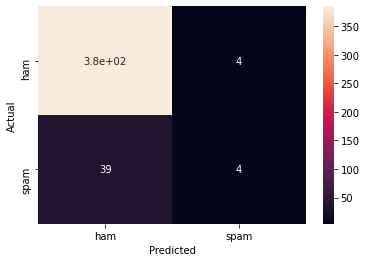

In [184]:
conf_matrix1 = pd.crosstab(y_test, pred2, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_matrix1, annot=True)

# Multinomial Naive Bayes Classifier

In [179]:
from sklearn.naive_bayes import MultinomialNB

In [180]:
nbcl1 = MultinomialNB()
nbcl1.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [182]:
#Evaluate the model on the training data set
pred3 = nbcl1.predict(X_train)
print(classification_report(y_train ,pred3 ))
print('Confusion Matrix: \n',confusion_matrix(y_train,pred3))
print()
print('Accuracy: ', accuracy_score(y_train,pred3))

              precision    recall  f1-score   support

         ham       0.97      0.93      0.95       874
        spam       0.63      0.78      0.70       134

   micro avg       0.91      0.91      0.91      1008
   macro avg       0.80      0.86      0.82      1008
weighted avg       0.92      0.91      0.91      1008

Confusion Matrix: 
 [[813  61]
 [ 29 105]]

Accuracy:  0.9107142857142857


In [183]:
#Evaluate the model on the test data set
pred4 = nbcl1.predict(X_test)
print(classification_report(y_test ,pred4))
print('Confusion Matrix: \n', confusion_matrix(y_test,pred4))
print()
print('Accuracy: ', accuracy_score(y_test,pred4))

              precision    recall  f1-score   support

         ham       0.93      0.76      0.84       389
        spam       0.18      0.49      0.27        43

   micro avg       0.73      0.73      0.73       432
   macro avg       0.56      0.62      0.55       432
weighted avg       0.86      0.73      0.78       432

Confusion Matrix: 
 [[296  93]
 [ 22  21]]

Accuracy:  0.7337962962962963


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

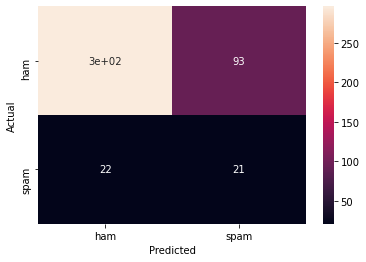

In [185]:
conf_matrix2 = pd.crosstab(y_test, pred4, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_matrix2, annot=True)

# AdaBoost Classifier

In [186]:
from sklearn.ensemble import AdaBoostClassifier

In [187]:
abc = AdaBoostClassifier(n_estimators=50, random_state=1, learning_rate =1)
abc.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
          n_estimators=50, random_state=1)

In [188]:
#Evaluate the model on the training data set
pred5 = abc.predict(X_train)
print(classification_report(y_train ,pred5 ))
print('Confusion Matrix: \n',confusion_matrix(y_train,pred5))
print()
print('Accuracy: ', accuracy_score(y_train,pred5))

              precision    recall  f1-score   support

         ham       0.95      0.99      0.97       874
        spam       0.88      0.63      0.73       134

   micro avg       0.94      0.94      0.94      1008
   macro avg       0.91      0.81      0.85      1008
weighted avg       0.94      0.94      0.93      1008

Confusion Matrix: 
 [[862  12]
 [ 50  84]]

Accuracy:  0.9384920634920635


In [189]:
#Evaluate the model on the test data set
pred6 = abc.predict(X_test)
print(classification_report(y_test,pred6))
print('Confusion Matrix: \n', confusion_matrix(y_test,pred6))
print()
print('Accuracy: ', accuracy_score(y_test,pred6))

              precision    recall  f1-score   support

         ham       0.92      0.90      0.91       389
        spam       0.27      0.33      0.29        43

   micro avg       0.84      0.84      0.84       432
   macro avg       0.60      0.61      0.60       432
weighted avg       0.86      0.84      0.85       432

Confusion Matrix: 
 [[351  38]
 [ 29  14]]

Accuracy:  0.8449074074074074


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

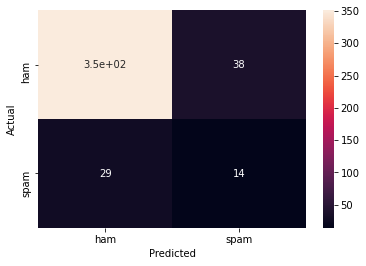

In [190]:
conf_matrix3 = pd.crosstab(y_test, pred6, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_matrix3, annot=True)

#  Adaboost with Naive Bayes

In [191]:
#Create a naive bayes classifier 
nbcl2 = MultinomialNB()

# Create adaboost classifer object
abc1 = AdaBoostClassifier(n_estimators=50, base_estimator= nbcl2,learning_rate=1)

# Train Adaboost Classifer
model = abc1.fit(X_train, y_train)


In [192]:
#Evaluate the model on the train data set
pred7 = abc1.predict(X_train)
print(classification_report(y_train,pred7))
print('Confusion Matrix: \n', confusion_matrix(y_train,pred7))
print()
print('Accuracy: ', accuracy_score(y_train,pred7))

              precision    recall  f1-score   support

         ham       0.87      0.92      0.89       874
        spam       0.15      0.10      0.12       134

   micro avg       0.81      0.81      0.81      1008
   macro avg       0.51      0.51      0.50      1008
weighted avg       0.77      0.81      0.79      1008

Confusion Matrix: 
 [[800  74]
 [121  13]]

Accuracy:  0.8065476190476191


In [193]:
#Evaluate the model on the test data set
pred8 = abc1.predict(X_test)
print(classification_report(y_test,pred8))
print('Confusion Matrix: \n', confusion_matrix(y_test,pred8))
print()
print('Accuracy: ', accuracy_score(y_test,pred8))

              precision    recall  f1-score   support

         ham       0.90      0.89      0.89       389
        spam       0.10      0.12      0.11        43

   micro avg       0.81      0.81      0.81       432
   macro avg       0.50      0.50      0.50       432
weighted avg       0.82      0.81      0.82       432

Confusion Matrix: 
 [[345  44]
 [ 38   5]]

Accuracy:  0.8101851851851852


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

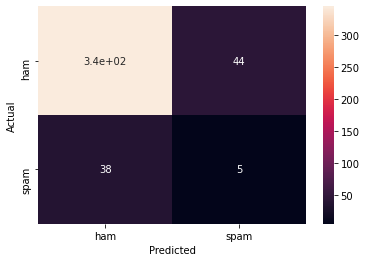

In [194]:
conf_matrix4 = pd.crosstab(y_test, pred8, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_matrix4, annot=True)

# Decision Tree  

In [196]:
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier 

In [197]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)


In [198]:
#Evaluate the model on the training data set
pred9= clf.predict(X_train)
print(classification_report(y_train ,pred9 ))
print('Confusion Matrix: \n',confusion_matrix(y_train,pred9))
print()
print('Accuracy: ', accuracy_score(y_train,pred9))

              precision    recall  f1-score   support

         ham       0.92      0.95      0.93       874
        spam       0.56      0.45      0.50       134

   micro avg       0.88      0.88      0.88      1008
   macro avg       0.74      0.70      0.71      1008
weighted avg       0.87      0.88      0.87      1008

Confusion Matrix: 
 [[827  47]
 [ 74  60]]

Accuracy:  0.8799603174603174


In [199]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
pred10= clf.predict(X_test)
print(classification_report(y_test,pred10 ))
print('Confusion Matrix: \n', confusion_matrix(y_test,pred10))
print()
print('Accuracy: ', accuracy_score(y_test,pred10))

              precision    recall  f1-score   support

         ham       0.92      0.92      0.92       389
        spam       0.30      0.33      0.31        43

   micro avg       0.86      0.86      0.86       432
   macro avg       0.61      0.62      0.62       432
weighted avg       0.86      0.86      0.86       432

Confusion Matrix: 
 [[356  33]
 [ 29  14]]

Accuracy:  0.8564814814814815


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

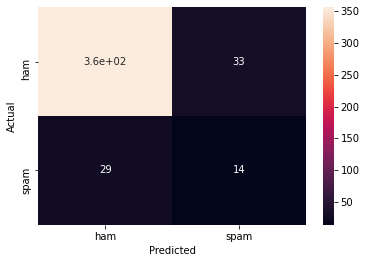

In [218]:
conf_matrix5 = pd.crosstab(y_test, pred10, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_matrix5, annot=True)

In [200]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

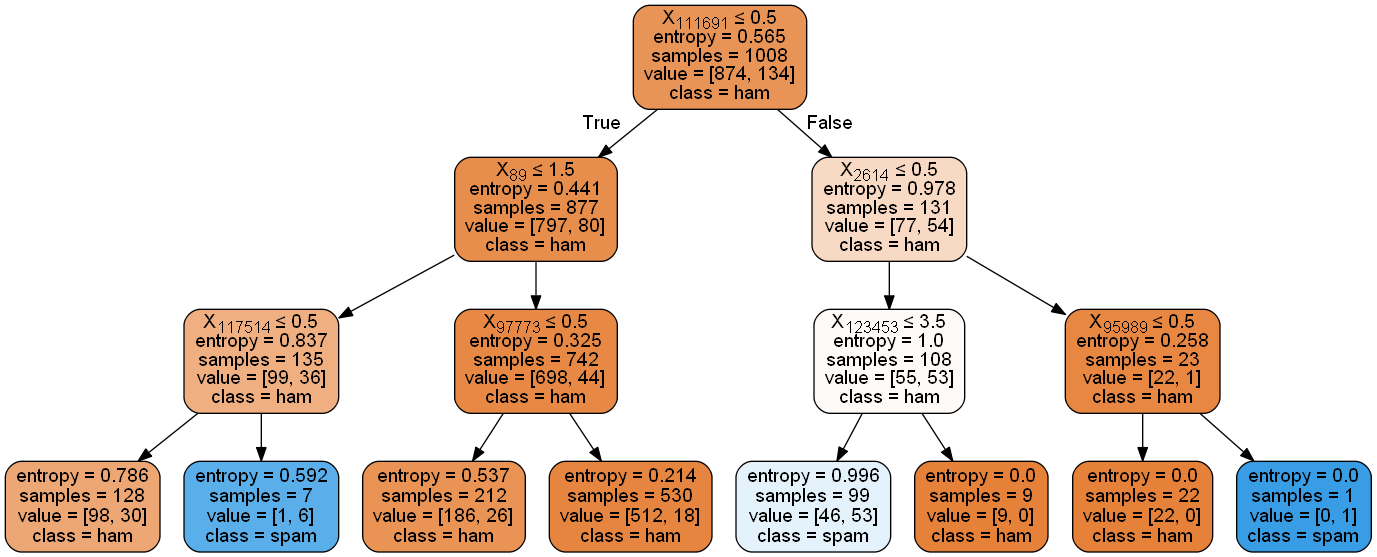

In [201]:
# Decision Tree Plot
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, class_names=['ham','spam'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('spam.png')
display(Image(graph.create_png()))

# Random Forest Classification

In [205]:
from sklearn.ensemble import RandomForestClassifier

In [206]:
rfc = RandomForestClassifier(n_estimators=50, random_state =1)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [208]:
#Evaluate the model on the training data set
pred11 = rfc.predict(X_train)
print(classification_report(y_train ,pred11 ))
print('Confusion Matrix: \n',confusion_matrix(y_train,pred11))
print()
print('Accuracy: ', accuracy_score(y_train,pred11))

              precision    recall  f1-score   support

         ham       1.00      1.00      1.00       874
        spam       1.00      0.98      0.99       134

   micro avg       1.00      1.00      1.00      1008
   macro avg       1.00      0.99      0.99      1008
weighted avg       1.00      1.00      1.00      1008

Confusion Matrix: 
 [[874   0]
 [  3 131]]

Accuracy:  0.9970238095238095


In [220]:
#Evaluate the model on the testing data set
pred12 = rfc.predict(X_test)
print(classification_report(y_test ,pred12))
print('Confusion Matrix: \n',confusion_matrix(y_test,pred12))
print()
print('Accuracy: ', accuracy_score(y_test,pred12))

              precision    recall  f1-score   support

         ham       0.90      0.99      0.94       389
        spam       0.17      0.02      0.04        43

   micro avg       0.89      0.89      0.89       432
   macro avg       0.53      0.51      0.49       432
weighted avg       0.83      0.89      0.85       432

Confusion Matrix: 
 [[384   5]
 [ 42   1]]

Accuracy:  0.8912037037037037


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

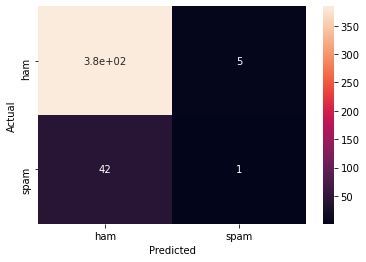

In [221]:
conf_matrix6 = pd.crosstab(y_test, pred12, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_matrix6, annot=True)

# Random Forest with Adaboost

In [214]:
#Create a Random forest object
rfc1 = RandomForestClassifier(n_estimators=50, random_state =1)
# Create adaboost classifer object
abc2= AdaBoostClassifier(n_estimators=50, base_estimator=rfc1,learning_rate=1)

# Train Adaboost Classifer
model1 = abc2.fit(X_train, y_train)

In [215]:
#Evaluate the model on the training data set
pred12= abc2.predict(X_train)
pred12 = model1.predict(X_train)
print(classification_report(y_train ,pred12 ))
print('Confusion Matrix: \n',confusion_matrix(y_train,pred12))
print()
print('Accuracy: ', accuracy_score(y_train,pred12))

              precision    recall  f1-score   support

         ham       1.00      1.00      1.00       874
        spam       1.00      1.00      1.00       134

   micro avg       1.00      1.00      1.00      1008
   macro avg       1.00      1.00      1.00      1008
weighted avg       1.00      1.00      1.00      1008

Confusion Matrix: 
 [[874   0]
 [  0 134]]

Accuracy:  1.0


In [217]:
pred13= abc2.predict(X_test)
pred13 = model1.predict(X_test)
print(classification_report(y_test ,pred13 ))
print('Confusion Matrix: \n',confusion_matrix(y_test,pred13))
print()
print('Accuracy: ', accuracy_score(y_test,pred13))

              precision    recall  f1-score   support

         ham       0.91      0.98      0.94       389
        spam       0.33      0.07      0.12        43

   micro avg       0.89      0.89      0.89       432
   macro avg       0.62      0.53      0.53       432
weighted avg       0.85      0.89      0.86       432

Confusion Matrix: 
 [[383   6]
 [ 40   3]]

Accuracy:  0.8935185185185185


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

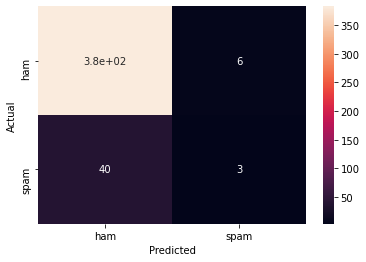

In [222]:
conf_matrix7 = pd.crosstab(y_test, pred13, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_matrix7, annot=True)

For this classification task the model who produced better accuracy in the testing set was the logistic regression model.
Better results could've been produced with a more even dataset. Due to the fact that the dataset was collected from my own inbox
the proportion between spam and ham was not good for a classification task.